<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2023/24 Semester</h3></th>
    </tr>
</table>

#### Name: Akul Arun
#### Student ID: S10243523

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
%matplotlib inline

*Note: More Packages will be imported along the way

## Step 1: Data Loading

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

## Step 2:  Testing Data Augmentation with Baseline Model

### Test 1

In [3]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

base_model = models.Sequential()
base_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Flatten())
base_model.add(layers.Dense(512, activation='relu'))
base_model.add(layers.Dense(10, activation='softmax'))


In [4]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [5]:
from tensorflow.keras import optimizers

base_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Aug_1.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

base_history = base_model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[mc]
)


Epoch 1/30
375/375 [==============================] - ETA: 0s - loss: 2.1663 - acc: 0.2036
Epoch 1: val_loss improved from inf to 2.01518, saving model to Aug_1.keras
375/375 [==============================] - 90s 231ms/step - loss: 2.1663 - acc: 0.2036 - val_loss: 2.0152 - val_acc: 0.2710
Epoch 2/30
375/375 [==============================] - ETA: 0s - loss: 2.0030 - acc: 0.2892
Epoch 2: val_loss improved from 2.01518 to 1.88628, saving model to Aug_1.keras
375/375 [==============================] - 88s 235ms/step - loss: 2.0030 - acc: 0.2892 - val_loss: 1.8863 - val_acc: 0.3380
Epoch 3/30
375/375 [==============================] - ETA: 0s - loss: 1.9077 - acc: 0.3313
Epoch 3: val_loss did not improve from 1.88628
375/375 [==============================] - 88s 235ms/step - loss: 1.9077 - acc: 0.3313 - val_loss: 2.0065 - val_acc: 0.3135
Epoch 4/30
375/375 [==============================] - ETA: 0s - loss: 1.8487 - acc: 0.3496
Epoch 4: val_loss improved from 1.88628 to 1.82207, saving mo

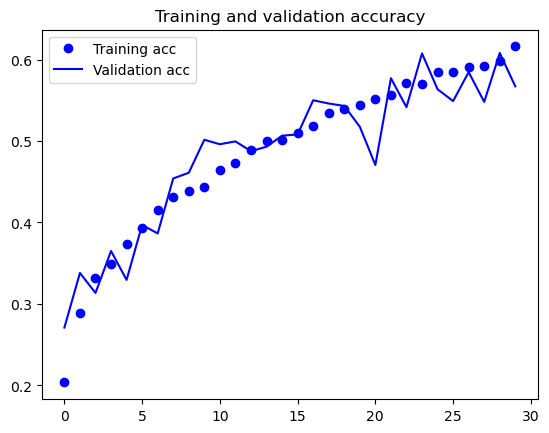

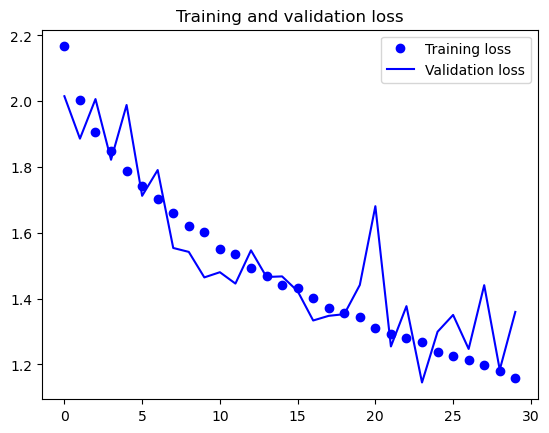

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = base_history.history['acc']
val_acc = base_history.history['val_acc']
loss = base_history.history['loss']
val_loss = base_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Test 2

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

base_model = models.Sequential()
base_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Flatten())
base_model.add(layers.Dense(512, activation='relu'))
base_model.add(layers.Dense(10, activation='softmax'))

In [4]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [5]:
from tensorflow.keras import optimizers

base_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,  # Consider setting to True based on the nature of your food images
    brightness_range=[0.8, 1.2],  # Adjust as needed based on the lighting conditions of your images
    channel_shift_range=20,
    featurewise_center=False,  # Better for images with different Lightings
    featurewise_std_normalization=False, 
    preprocessing_function=None  # You can define a specific preprocessing function if needed
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Aug_2.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

base_history = base_model.fit(
    train_generator,
    epochs=60,
    validation_data=validation_generator,
    callbacks=[mc]
)


Epoch 1/60
375/375 [==============================] - ETA: 0s - loss: 2.1488 - acc: 0.2121
Epoch 1: val_loss improved from inf to 1.94641, saving model to Aug_2.keras
375/375 [==============================] - 115s 296ms/step - loss: 2.1488 - acc: 0.2121 - val_loss: 1.9464 - val_acc: 0.3145
Epoch 2/60
375/375 [==============================] - ETA: 0s - loss: 1.9961 - acc: 0.2925
Epoch 2: val_loss improved from 1.94641 to 1.91233, saving model to Aug_2.keras
375/375 [==============================] - 120s 319ms/step - loss: 1.9961 - acc: 0.2925 - val_loss: 1.9123 - val_acc: 0.3340
Epoch 3/60
375/375 [==============================] - ETA: 0s - loss: 1.9056 - acc: 0.3300
Epoch 3: val_loss improved from 1.91233 to 1.73133, saving model to Aug_2.keras
375/375 [==============================] - 106s 282ms/step - loss: 1.9056 - acc: 0.3300 - val_loss: 1.7313 - val_acc: 0.3905
Epoch 4/60
375/375 [==============================] - ETA: 0s - loss: 1.8330 - acc: 0.3557
Epoch 4: val_loss did not

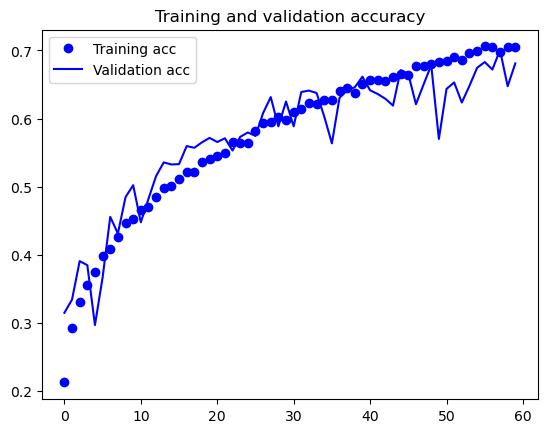

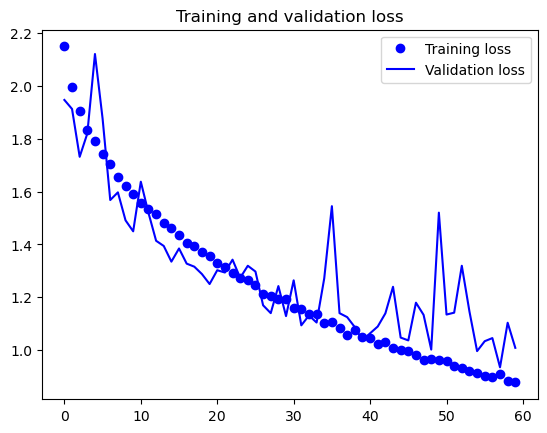

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = base_history.history['acc']
val_acc = base_history.history['val_acc']
loss = base_history.history['loss']
val_loss = base_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Test 3

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
# %pip install opencv-python
import cv2
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

base_model = models.Sequential()
base_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Flatten())
base_model.add(layers.Dense(512, activation='relu'))
base_model.add(layers.Dense(10, activation='softmax'))

In [4]:
from tensorflow.keras import optimizers

base_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def random_hue_and_gaussian_blur(image):
    # Apply random hue
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv[:, :, 0] = (hsv[:, :, 0] + np.random.uniform(-20, 20)) % 180
    image_hue = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    # Apply Gaussian blur
    image_blur = cv2.GaussianBlur(image_hue, (5, 5), 0.5)

    return image_blur

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=random_hue_and_gaussian_blur
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20, 10)


In [7]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Aug_3.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

base_history = base_model.fit(
    train_generator,
    epochs=80,
    validation_data=validation_generator,
    callbacks=[mc]
)


Epoch 1/80
375/375 [==============================] - ETA: 0s - loss: 2.1936 - acc: 0.1917
Epoch 1: val_loss improved from inf to 2.13930, saving model to Aug_3.keras
375/375 [==============================] - 115s 297ms/step - loss: 2.1936 - acc: 0.1917 - val_loss: 2.1393 - val_acc: 0.2040
Epoch 2/80
375/375 [==============================] - ETA: 0s - loss: 2.0669 - acc: 0.2595
Epoch 2: val_loss improved from 2.13930 to 1.96010, saving model to Aug_3.keras
375/375 [==============================] - 114s 304ms/step - loss: 2.0669 - acc: 0.2595 - val_loss: 1.9601 - val_acc: 0.3100
Epoch 3/80
375/375 [==============================] - ETA: 0s - loss: 1.9919 - acc: 0.2921
Epoch 3: val_loss improved from 1.96010 to 1.86352, saving model to Aug_3.keras
375/375 [==============================] - 111s 295ms/step - loss: 1.9919 - acc: 0.2921 - val_loss: 1.8635 - val_acc: 0.3525
Epoch 4/80
375/375 [==============================] - ETA: 0s - loss: 1.9335 - acc: 0.3215
Epoch 4: val_loss did not

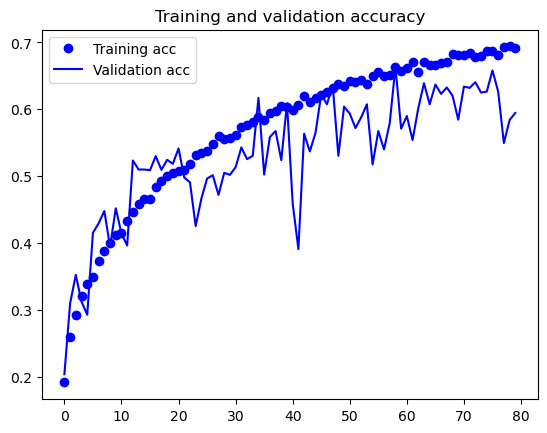

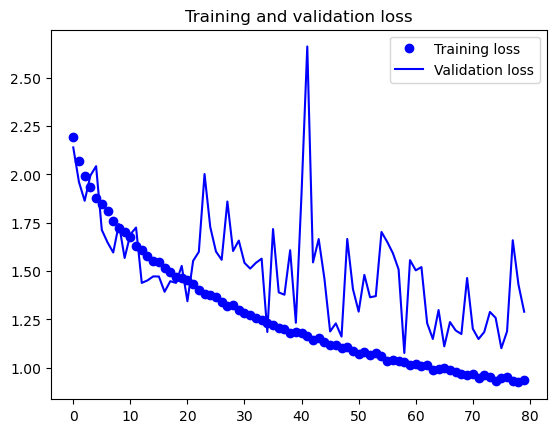

In [8]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = base_history.history['acc']
val_acc = base_history.history['val_acc']
loss = base_history.history['loss']
val_loss = base_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Test 4

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
# %pip install opencv-python
import cv2
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

base_model = models.Sequential()
base_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Flatten())
base_model.add(layers.Dense(512, activation='relu'))
base_model.add(layers.Dense(10, activation='softmax'))

In [4]:
from tensorflow.keras import optimizers

base_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

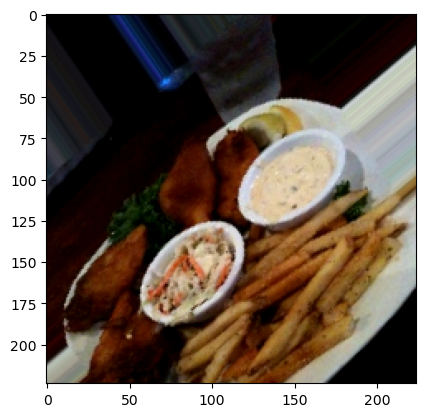

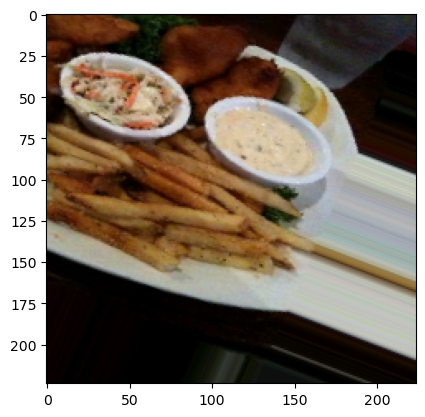

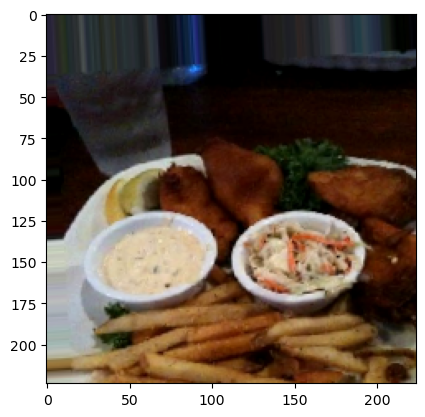

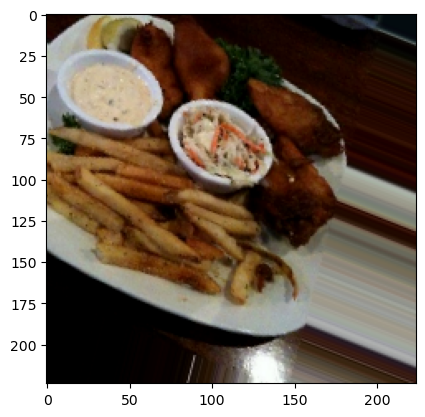

In [6]:
# This is module with image preprocessing utilities
import os
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
train_fish_dir = os.path.join(train_dir, './fish_and_chips')

fnames = [os.path.join(train_fish_dir, fname) for fname in os.listdir(train_fish_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(img_size, img_size))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        

plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

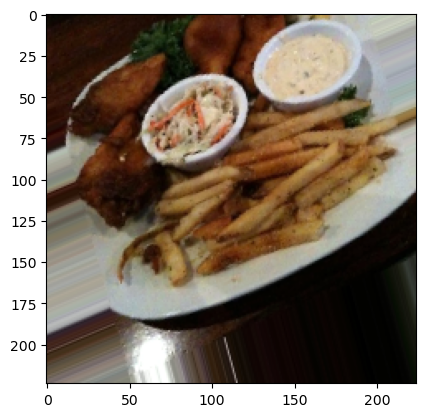

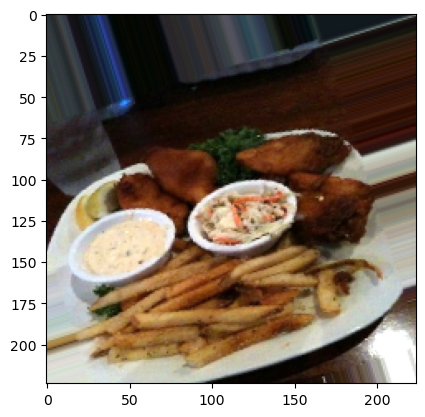

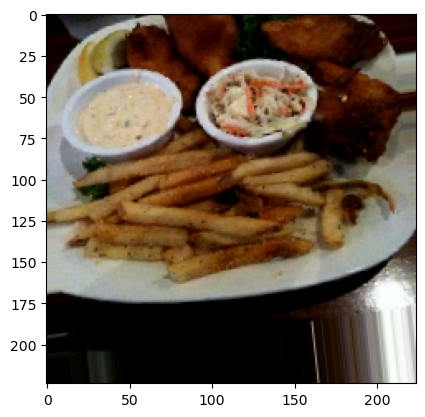

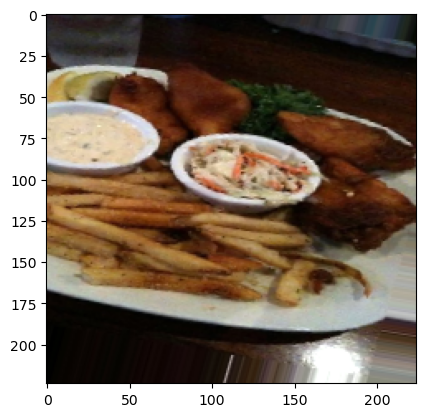

In [10]:
# This is module with image preprocessing utilities
import os
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
train_fish_dir = os.path.join(train_dir, './fish_and_chips')

fnames = [os.path.join(train_fish_dir, fname) for fname in os.listdir(train_fish_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(img_size, img_size))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        

plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20, 10)


In [9]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Aug_4.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

base_history = base_model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/100
375/375 [==============================] - ETA: 0s - loss: 2.1752 - acc: 0.1996
Epoch 1: val_loss improved from inf to 1.97525, saving model to Aug_4.keras
375/375 [==============================] - 96s 247ms/step - loss: 2.1752 - acc: 0.1996 - val_loss: 1.9752 - val_acc: 0.3000
Epoch 2/100
375/375 [==============================] - ETA: 0s - loss: 2.0183 - acc: 0.2833
Epoch 2: val_loss did not improve from 1.97525
375/375 [==============================] - 91s 242ms/step - loss: 2.0183 - acc: 0.2833 - val_loss: 2.0295 - val_acc: 0.2815
Epoch 3/100
375/375 [==============================] - ETA: 0s - loss: 1.9502 - acc: 0.3085
Epoch 3: val_loss improved from 1.97525 to 1.75811, saving model to Aug_4.keras
375/375 [==============================] - 93s 248ms/step - loss: 1.9502 - acc: 0.3085 - val_loss: 1.7581 - val_acc: 0.3905
Epoch 4/100
375/375 [==============================] - ETA: 0s - loss: 1.8643 - acc: 0.3464
Epoch 4: val_loss improved from 1.75811 to 1.74413, savin

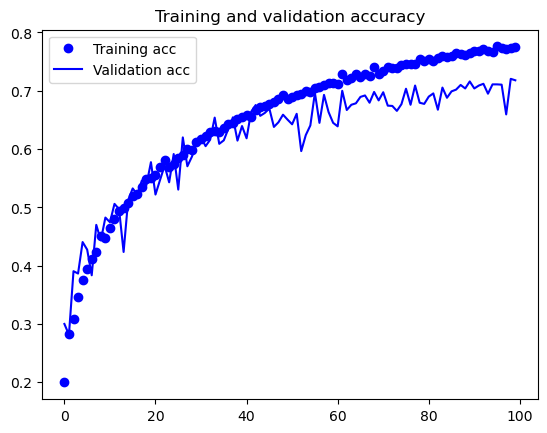

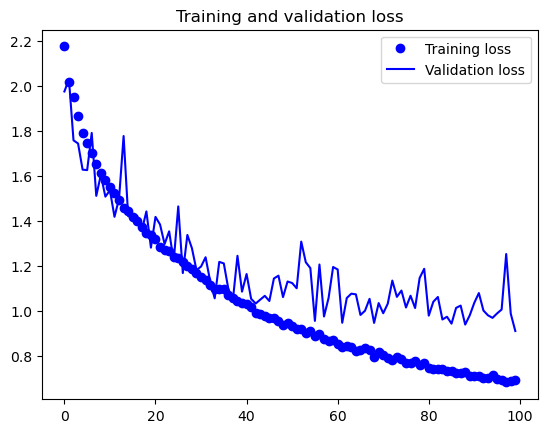

In [10]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = base_history.history['acc']
val_acc = base_history.history['val_acc']
loss = base_history.history['loss']
val_loss = base_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Test 5: Trying to Reduce Model by Decreasing Augmentations 

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
# %pip install opencv-python
import cv2
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

base_model = models.Sequential()
base_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Flatten())
base_model.add(layers.Dense(512, activation='relu'))
base_model.add(layers.Dense(10, activation='softmax'))

In [4]:
from tensorflow.keras import optimizers

base_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

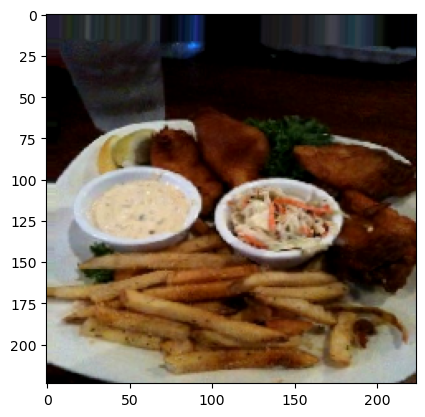

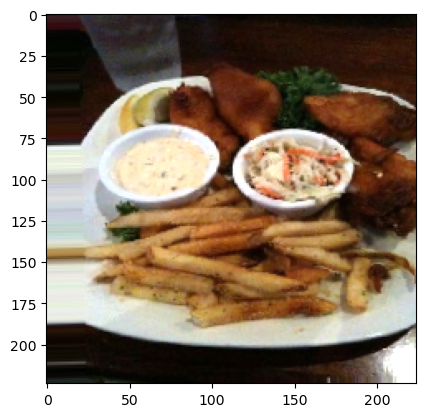

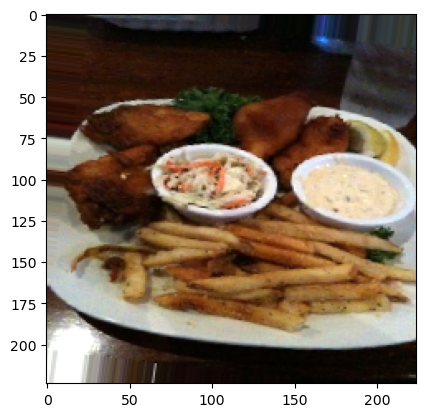

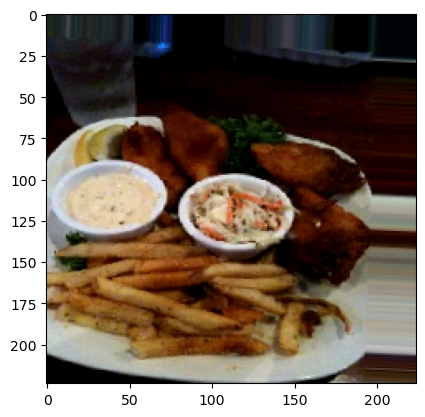

In [6]:
# This is module with image preprocessing utilities
import os
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
train_fish_dir = os.path.join(train_dir, './fish_and_chips')

fnames = [os.path.join(train_fish_dir, fname) for fname in os.listdir(train_fish_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(img_size, img_size))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        

plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20, 10)


In [10]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Aug_5.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

base_history = base_model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/100
375/375 [==============================] - ETA: 0s - loss: 2.1262 - acc: 0.2265
Epoch 1: val_loss improved from inf to 1.92131, saving model to Aug_5.keras
375/375 [==============================] - 97s 246ms/step - loss: 2.1262 - acc: 0.2265 - val_loss: 1.9213 - val_acc: 0.3260
Epoch 2/100
375/375 [==============================] - ETA: 0s - loss: 1.9192 - acc: 0.3287
Epoch 2: val_loss did not improve from 1.92131
375/375 [==============================] - 89s 238ms/step - loss: 1.9192 - acc: 0.3287 - val_loss: 1.9604 - val_acc: 0.3050
Epoch 3/100
375/375 [==============================] - ETA: 0s - loss: 1.8179 - acc: 0.3677
Epoch 3: val_loss improved from 1.92131 to 1.79436, saving model to Aug_5.keras
375/375 [==============================] - 88s 235ms/step - loss: 1.8179 - acc: 0.3677 - val_loss: 1.7944 - val_acc: 0.3765
Epoch 4/100
375/375 [==============================] - ETA: 0s - loss: 1.7263 - acc: 0.4020
Epoch 4: val_loss improved from 1.79436 to 1.65866, savin

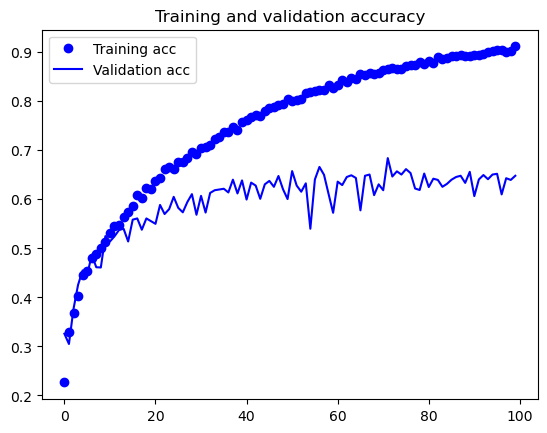

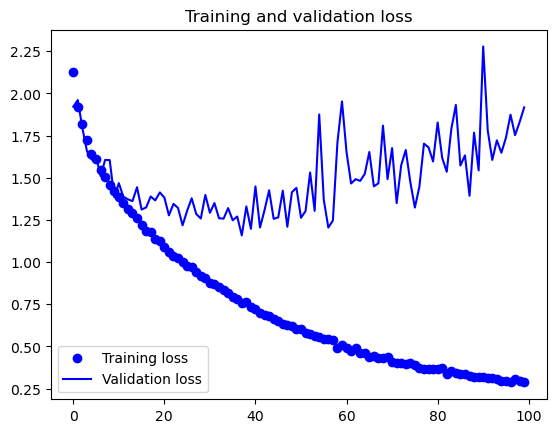

In [11]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = base_history.history['acc']
val_acc = base_history.history['val_acc']
loss = base_history.history['loss']
val_loss = base_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Test 6: Increasing the augmentations to check for increase in model performance

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
# %pip install opencv-python
import cv2
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

base_model = models.Sequential()
base_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Flatten())
base_model.add(layers.Dense(512, activation='relu'))
base_model.add(layers.Dense(10, activation='softmax'))

In [4]:
from tensorflow.keras import optimizers

base_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20, 10)


In [7]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Aug_6.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

base_history = base_model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/100
375/375 [==============================] - ETA: 0s - loss: 2.1469 - acc: 0.2124
Epoch 1: val_loss improved from inf to 2.12321, saving model to Aug_6.keras
375/375 [==============================] - 108s 275ms/step - loss: 2.1469 - acc: 0.2124 - val_loss: 2.1232 - val_acc: 0.2205
Epoch 2/100
375/375 [==============================] - ETA: 0s - loss: 1.9579 - acc: 0.3093
Epoch 2: val_loss improved from 2.12321 to 1.93927, saving model to Aug_6.keras
375/375 [==============================] - 105s 280ms/step - loss: 1.9579 - acc: 0.3093 - val_loss: 1.9393 - val_acc: 0.3130
Epoch 3/100
375/375 [==============================] - ETA: 0s - loss: 1.8601 - acc: 0.3479
Epoch 3: val_loss improved from 1.93927 to 1.85730, saving model to Aug_6.keras
375/375 [==============================] - 101s 269ms/step - loss: 1.8601 - acc: 0.3479 - val_loss: 1.8573 - val_acc: 0.3500
Epoch 4/100
375/375 [==============================] - ETA: 0s - loss: 1.7900 - acc: 0.3783
Epoch 4: val_loss imp

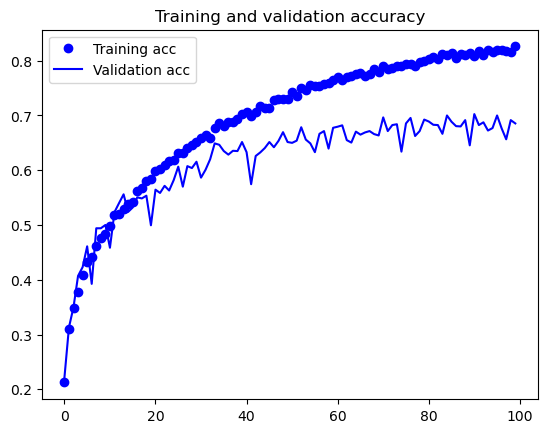

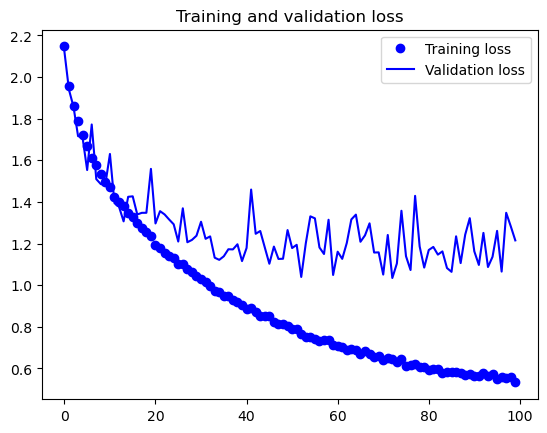

In [8]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = base_history.history['acc']
val_acc = base_history.history['val_acc']
loss = base_history.history['loss']
val_loss = base_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Augmentations that did not work

1. Adaptive Histogram Equalization

In [ ]:
def adaptive_histogram_equalization(image, tile_size=(8, 8)):
    # Convert the image to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

    # Split the LAB image into L, A, and B channels
    l, a, b = cv2.split(lab)

    # Apply CLAHE independently to the L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=tile_size)

    # Ensure the L channel is of type uint8
    l_uint8 = cv2.convertScaleAbs(l)

    # Apply CLAHE to the L channel
    cl_r = clahe.apply(l_uint8)

    # Convert all channels to the same data type
    cl_r = cl_r.astype(l.dtype)

    # Merge the enhanced L channel with the original A and B channels
    enhanced_lab = cv2.merge([cl_r, a, b])

    # Convert the enhanced LAB image back to RGB color space
    enhanced_rgb = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2RGB)

    return enhanced_rgb

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False,
    preprocessing_function=adaptive_histogram_equalization  
)

2. Colour Jittering

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def color_jittering(image, intensity=0.2):
    """
    Apply color jittering to the input image.

    Parameters:
    - image: Input image (float32 format).
    - intensity: Intensity of color jittering.

    Returns:
    - Jittered image (float32 format).
    """
    # Randomly adjust brightness
    image = image + np.random.uniform(-intensity, intensity)

    # Randomly adjust contrast
    image = image * np.random.uniform(1 - intensity, 1 + intensity)

    # Clip values to the valid range [0, 1]
    image = np.clip(image, 0, 1)

    return image

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False,
    preprocessing_function=color_jittering  # Include the color_jittering function
)